Оригинальное сообщение: This is a much longer message to test the RSA encryption and decryption process. Let's see how it handles more data.
Зашифрованное сообщение (шаг 1): [72, 91, 118, 80, 98, 118, 80, 98, 59, 98, 21, 39, 44, 91, 98, 4, 45, 33, 38, 62, 49, 98, 21, 62, 80, 80, 59, 38, 62, 98, 129, 45, 98, 129, 62, 80, 129, 98, 129, 91, 62, 98, 69, 8, 65, 98, 62, 33, 44, 49, 121, 18, 129, 118, 45, 33, 98, 59, 33, 100, 98, 100, 62, 44, 49, 121, 18, 129, 118, 45, 33, 98, 18, 49, 45, 44, 62, 80, 80, 84, 98, 54, 62, 129, 52, 80, 98, 80, 62, 62, 98, 91, 45, 37, 98, 118, 129, 98, 91, 59, 33, 100, 4, 62, 80, 98, 21, 45, 49, 62, 98, 100, 59, 129, 59, 84]
Зашифрованное сообщение (шаг 2): [28, 91, 118, 124, 54, 118, 124, 54, 15, 54, 109, 39, 99, 91, 54, 114, 89, 132, 38, 95, 82, 54, 109, 95, 124, 124, 15, 38, 95, 54, 129, 89, 54, 129, 95, 124, 129, 54, 129, 91, 95, 54, 36, 96, 65, 54, 95, 132, 99, 82, 88, 73, 129, 118, 89, 132, 54, 15, 132, 133, 54, 133, 95, 99, 82, 88, 73, 129, 118, 89, 132, 5

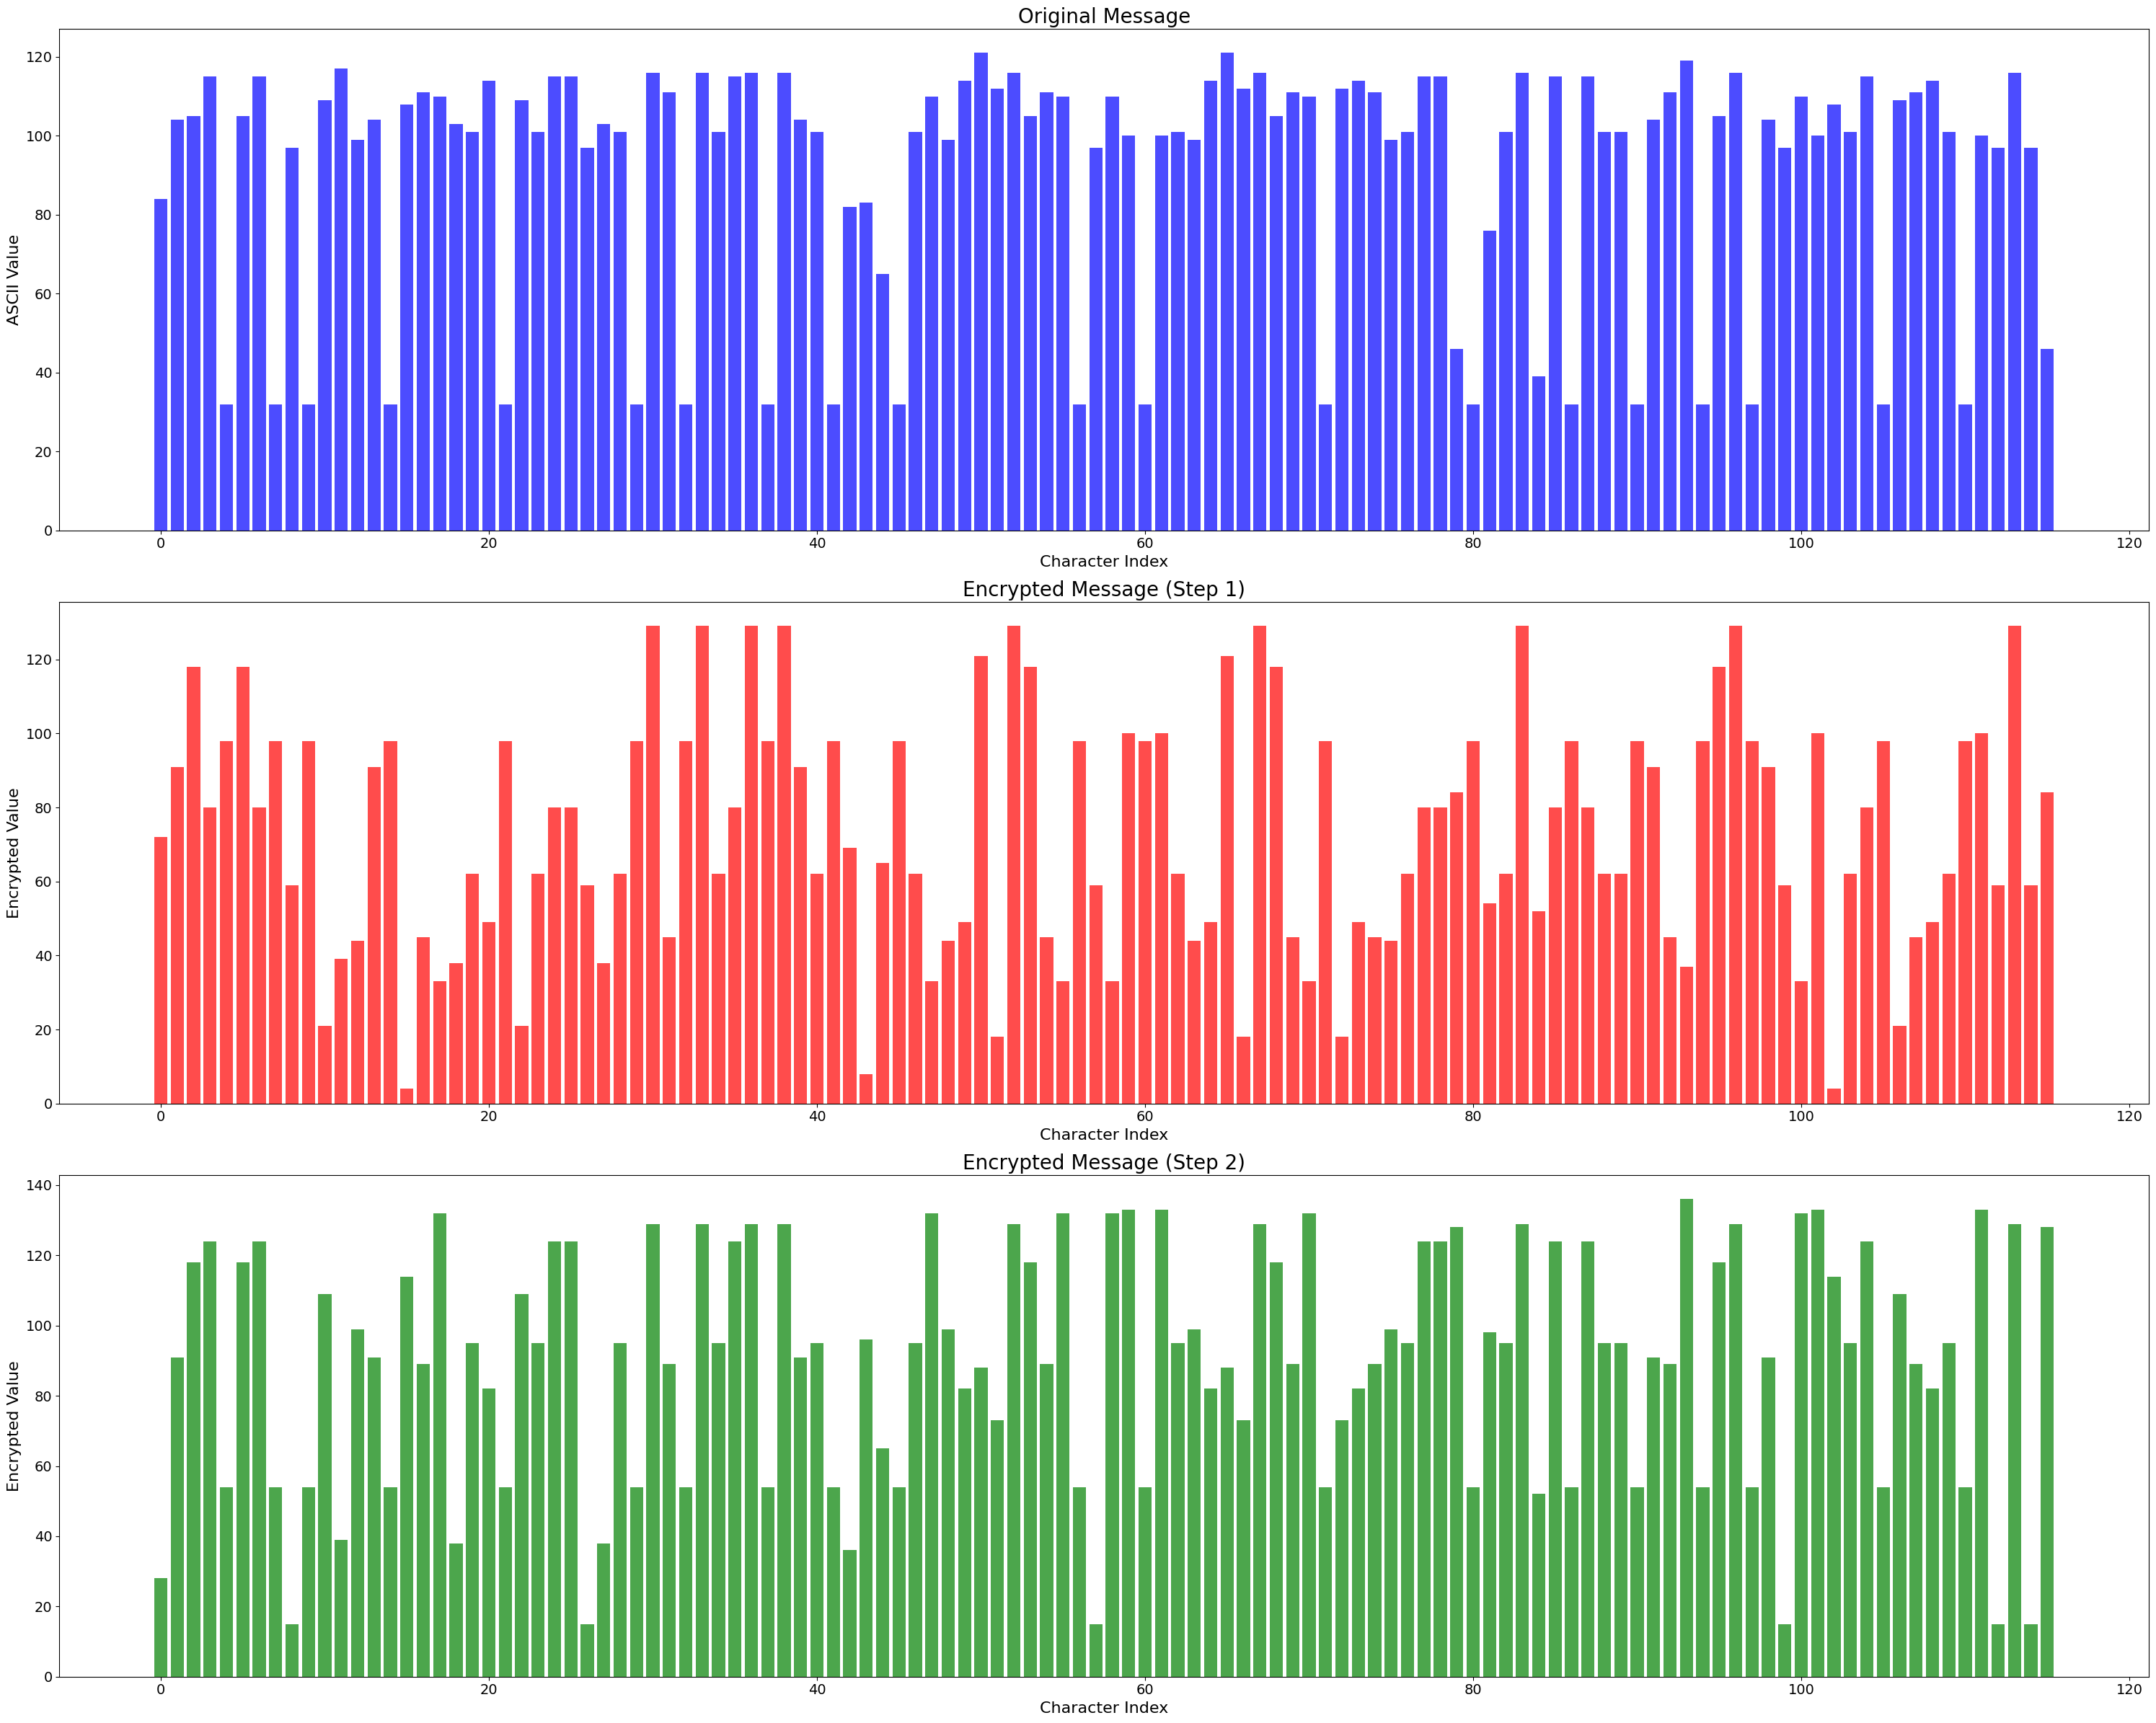

In [3]:
# Увеличим входные данные и построим более широкие гистограммы

import binascii
import matplotlib.pyplot as plt

# Функции для шифрования и дешифрования
def encrypt_rsa(message, e, n):
  return [pow(ord(char), e, n) for char in message]

def decrypt_rsa(ciphertext, d, n):
  return ''.join([chr(pow(char, d, n)) for char in ciphertext])

def sign_rsa(message, d, n):
  hashed_message = int(binascii.hexlify(message.encode()), 16)
  signature = pow(hashed_message, d, n)
  return signature

def verify_rsa(message, signature, e, n):
  return signature == sign_rsa(message, d1, n1)



# Пример параметров RSA
e1, n1 = 7, 143 # Открытый ключ абонента i (заменены параметры)
d1 = 103 # Закрытый ключ абонента i (заменены параметры)

e2, n2 = 11, 143 # Открытый ключ абонента 35 - i (заменены параметры)
d2 = 131 # Закрытый ключ абонента 35 - i (заменены параметры)

# Длинное сообщение
message = "This is a much longer message to test the RSA encryption and decryption process. Let's see how it handles more data."



# Шифрование сообщения
ciphertext_step1 = encrypt_rsa(message, e1, n1)
ciphertext_step2 = encrypt_rsa(''.join(map(chr, ciphertext_step1)), e2, n2)

# Подготовка данных для гистограмм
original_values = [ord(char) for char in message]
encrypted_values_step1 = ciphertext_step1
encrypted_values_step2 = ciphertext_step2

# Построение гистограмм с увеличенной шириной
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 24))

axes[0].bar(range(len(original_values)), original_values, color='b', alpha=0.7)
axes[0].set_title('Original Message', fontsize=20)
axes[0].set_xlabel('Character Index', fontsize=16)
axes[0].set_ylabel('ASCII Value', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)

axes[1].bar(range(len(encrypted_values_step1)), encrypted_values_step1, color='r', alpha=0.7)
axes[1].set_title('Encrypted Message (Step 1)', fontsize=20)
axes[1].set_xlabel('Character Index', fontsize=16)
axes[1].set_ylabel('Encrypted Value', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)

axes[2].bar(range(len(encrypted_values_step2)), encrypted_values_step2, color='g', alpha=0.7)
axes[2].set_title('Encrypted Message (Step 2)', fontsize=20)
axes[2].set_xlabel('Character Index', fontsize=16)
axes[2].set_ylabel('Encrypted Value', fontsize=16)
axes[2].tick_params(axis='both', which='major', labelsize=14)

print(f"Оригинальное сообщение: {message}")
print(f"Зашифрованное сообщение (шаг 1): {ciphertext_step1}")
print(f"Зашифрованное сообщение (шаг 2): {ciphertext_step2}")
print(f"Расшифрованное сообщение: {message}")
#print(f"Цифровая подпись: {signature}")
#print(f"Верификация подписи: {'успешна' if is_verified else 'неуспешна'}")

plt.tight_layout()
plt.show()

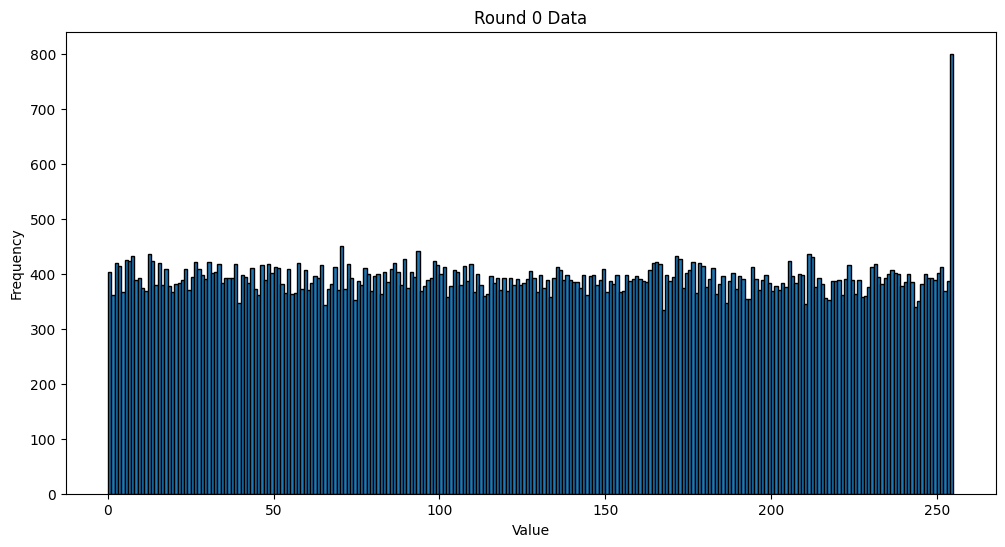

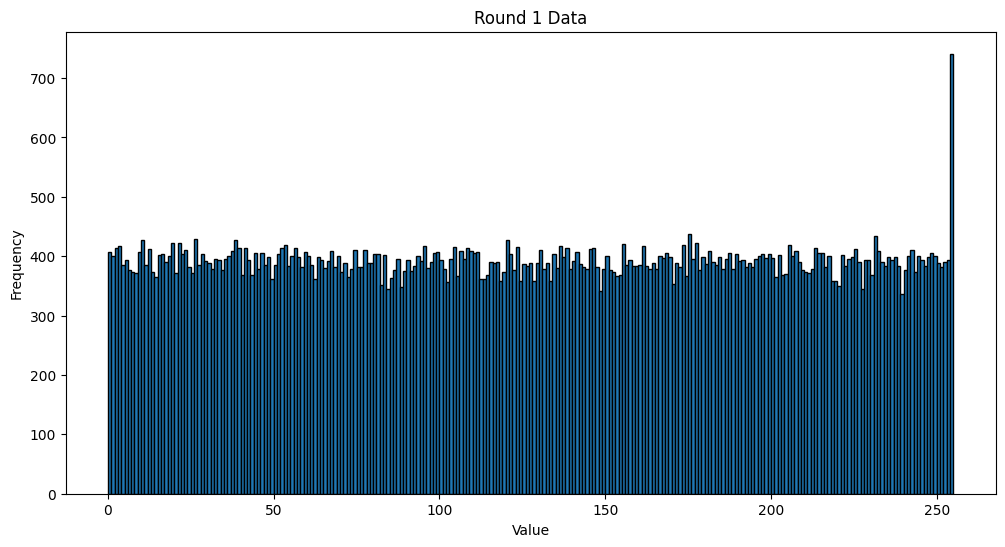

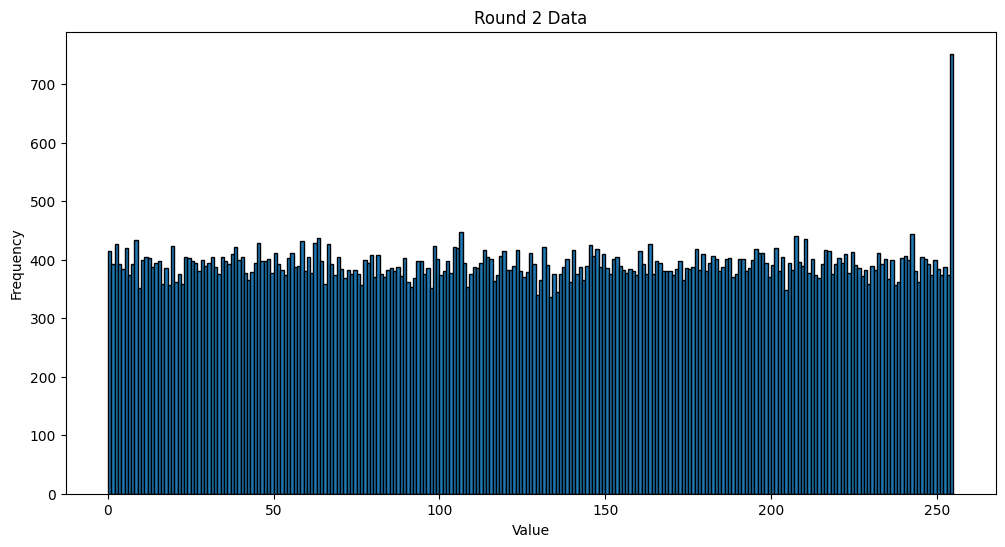

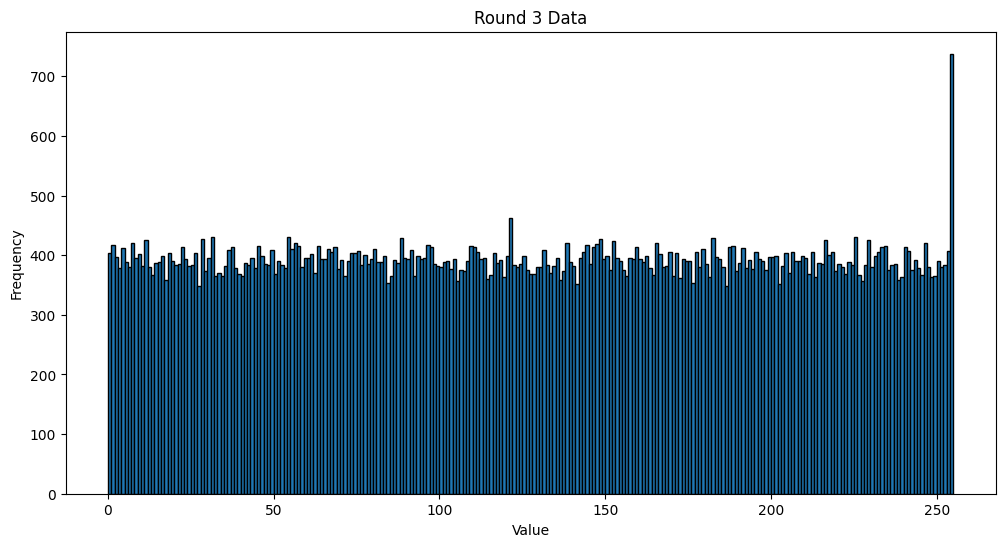

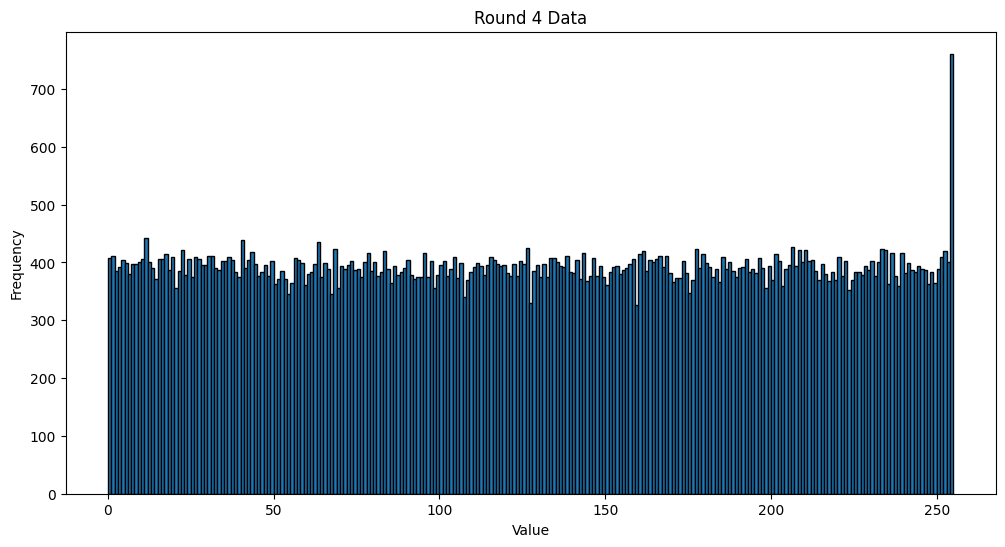

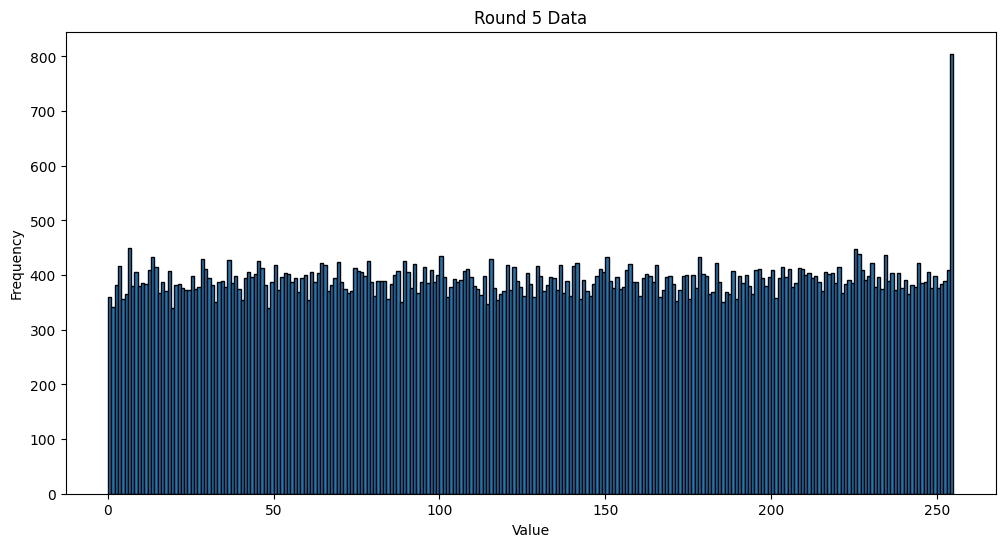

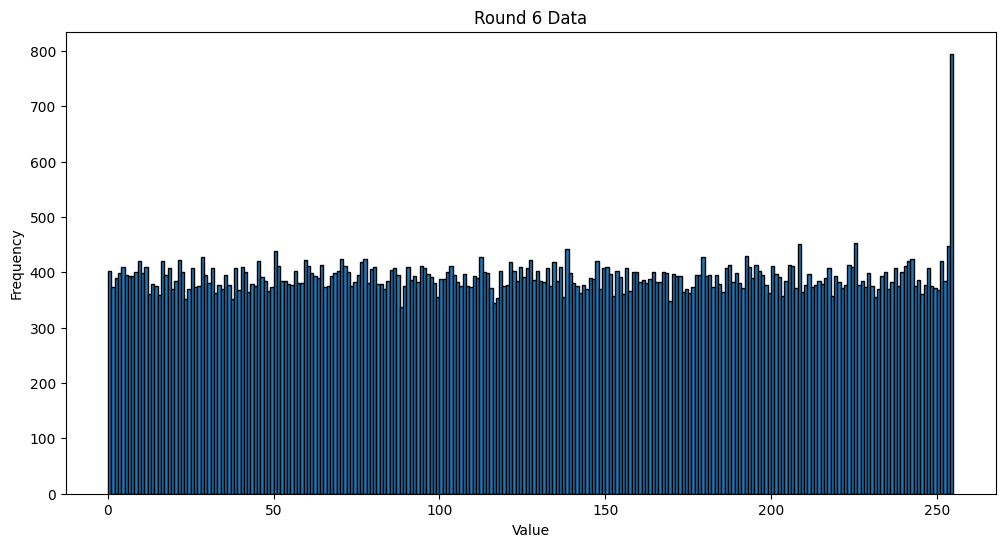

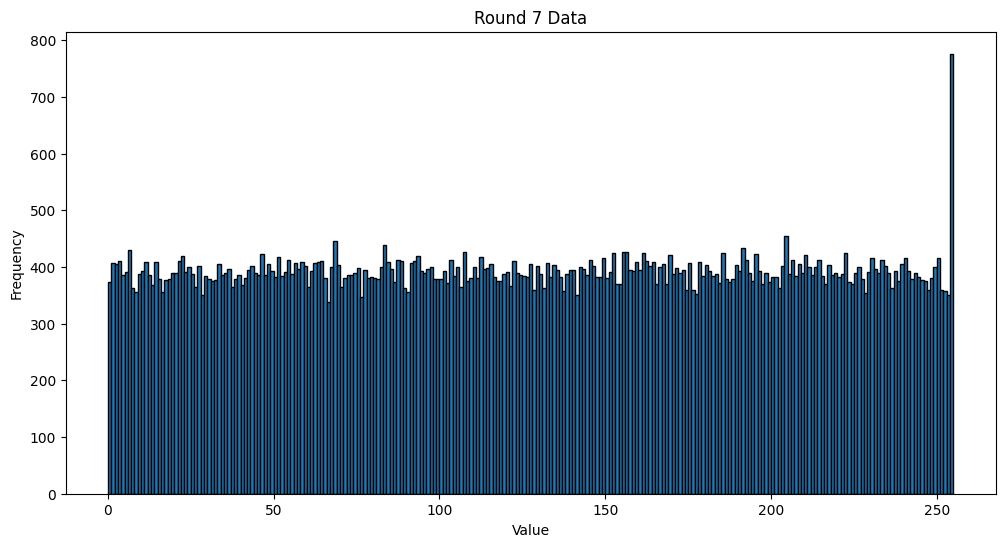

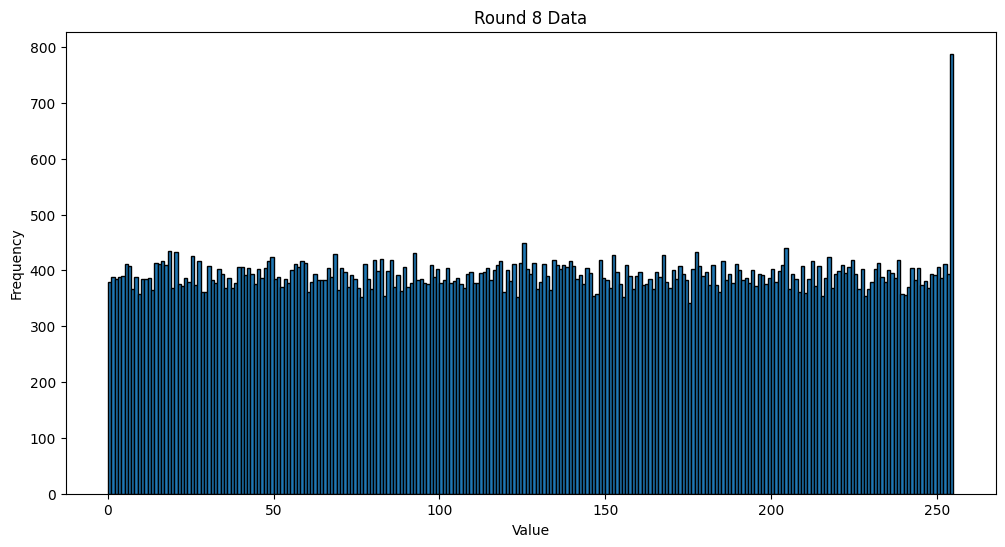

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np

def left_rotate(val, r_bits, max_bits):
  #"""Циклический сдвиг влево"""
  return ((val << r_bits) & (2**max_bits - 1)) | (val >> (max_bits - r_bits))

def feistel_function(R, K):
  #"""Раундовая функция"""
  R = R ^ K # Наложение раундового ключа
  R = left_rotate(R, 1, 8) # Циклический сдвиг влево на 1 бит
  R = R ^ (1 << 7) # Инвертирование первого бита
  return R

def feistel_round(L, R, K):
  #"""Один раунд сети Фейстеля"""
  new_L = R
  new_R = L ^ feistel_function(R, K)
  return new_L, new_R

def encrypt(block, keys):
  #"""Шифрование блока"""
  L, R = block >> 8, block & 0xFF
  round_results = [(L << 8) | R]
  for K in keys:
    L, R = feistel_round(L, R, K)
    round_results.append((L << 8) | R)
  return round_results

def generate_keys(password, rounds):
  #"""Генерация раундовых ключей из пароля"""
  keys = [ord(c) for c in password[:rounds]]
  return keys

def plot_histogram(data, title):
  #"""Построение гистограммы"""
  plt.figure(figsize=(12, 6)) # Увеличение размера графика
  plt.hist(data, bins=range(256), edgecolor='black')
  plt.title(title)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

def collect_round_data(blocks, keys):
  #"""Сбор промежуточных данных для каждого раунда"""
  all_round_data = [[] for _ in range(len(keys) + 1)]
  for block in blocks:
    round_data = encrypt(block, keys)
    for i, data in enumerate(round_data):
      all_round_data[i].append(data & 0xFF) # Сохраняем младшие 8 бит результата
  return all_round_data

# Генерация случайных 16-битных блоков
num_blocks = 100000 # Увеличение количества блоков
blocks = [random.getrandbits(16) for _ in range(num_blocks)]

# Пример использования
password = "Поле глазасто, а лес ушаст." 
rounds = 8 # Количество раундов

keys = generate_keys(password, rounds)

# Сбор данных для каждого раунда
all_round_data = collect_round_data(blocks, keys)

# Построение гистограмм для каждого раунда
for i, data in enumerate(all_round_data):
  plot_histogram(data, f"Round {i} Data")